<a href="https://colab.research.google.com/github/JuanFdoGf/PracticasDS/blob/main/Clasificaci%C3%B3n_Noticias_ADAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Cargando el conjunto de datos

In [1]:
from tensorflow.keras.datasets import reuters

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
# índice de las palabras
word_index = reuters.get_word_index()

In [4]:
print('Training data:',len(train_data))
print('Testing data:',len(test_data))

Training data: 8982
Testing data: 2246


##2. Preprocesamiento del conjunto de datos

In [5]:
import numpy as np

def vectorize(seqs, dim=10000):
    results = np.zeros((len(seqs), dim))
    for i, seq in enumerate(seqs):
        results[i, seq] = 1
    return results

In [6]:
# Vectorizamos el conjunto de datos de entrenamiento y el de pruebas
X_train = vectorize(train_data, 10000)
X_test = vectorize(test_data, 10000)

In [7]:
# Cada una de las reseñas se corresponde con un vector formado por 1s y 0s
print('Valores Originales:\t', train_data[0][:15])
print('Valores Vectorizados:\t', X_train[0][:15])

Valores Originales:	 [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16]
Valores Vectorizados:	 [0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]


In [8]:
# Transformamos las etiquetas de salida en vectores
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(train_labels)
Y_test = to_categorical(test_labels)

##3. División del conjunto de datos

In [9]:
from sklearn.model_selection import train_test_split

X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.5)

In [10]:
print('Longitud subconjunto de entrenamiento: ', len(X_train))
print('Longitud subconjunto de validación: ', len(X_val))
print('Longitud subconjunto de pruebas: ', len(X_test))

Longitud subconjunto de entrenamiento:  8982
Longitud subconjunto de validación:  1123
Longitud subconjunto de pruebas:  1123


##4. Construcción de la red neuronal artificial

In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [12]:
from tensorflow.keras import optimizers

opt_func = optimizers.Adam()

In [13]:
model.compile(
    optimizer=opt_func,
    loss='categorical_crossentropy',
    metrics=['accuracy', 'Precision']
)

In [14]:
history = model.fit(
    X_train,
    Y_train,
    epochs=10,
    batch_size=512,
    validation_data=(X_val, Y_val))

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 260ms/step - Precision: 0.6228 - accuracy: 0.4605 - loss: 2.7509 - val_Precision: 0.8549 - val_accuracy: 0.7061 - val_loss: 1.4378
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 310ms/step - Precision: 0.9154 - accuracy: 0.7965 - loss: 0.9886 - val_Precision: 0.8768 - val_accuracy: 0.7792 - val_loss: 1.0449
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 303ms/step - Precision: 0.9431 - accuracy: 0.8919 - loss: 0.5448 - val_Precision: 0.8715 - val_accuracy: 0.7961 - val_loss: 0.8935
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 229ms/step - Precision: 0.9570 - accuracy: 0.9344 - loss: 0.3264 - val_Precision: 0.8606 - val_accuracy: 0.8005 - val_loss: 0.8582
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 307ms/step - Precision: 0.9602 - accuracy: 0.9464 - loss: 0.2411 - val_Precision: 0.8543 - val_accuracy: 0.8014 - val_loss: 0.8510
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 237ms/step - Precision: 0.9642 - accuracy: 0.9533 - loss: 0.1808 - val_Precision: 0.8434 - val_acc

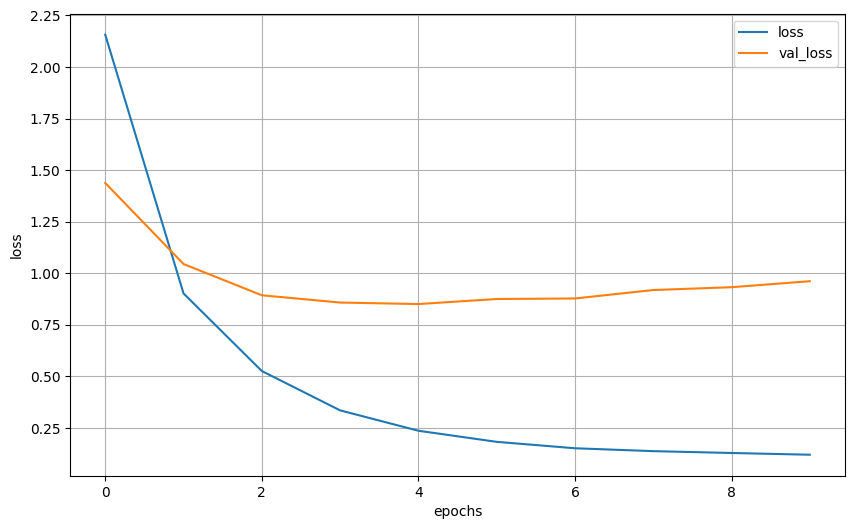

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(10, 6))
plt.grid(True)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

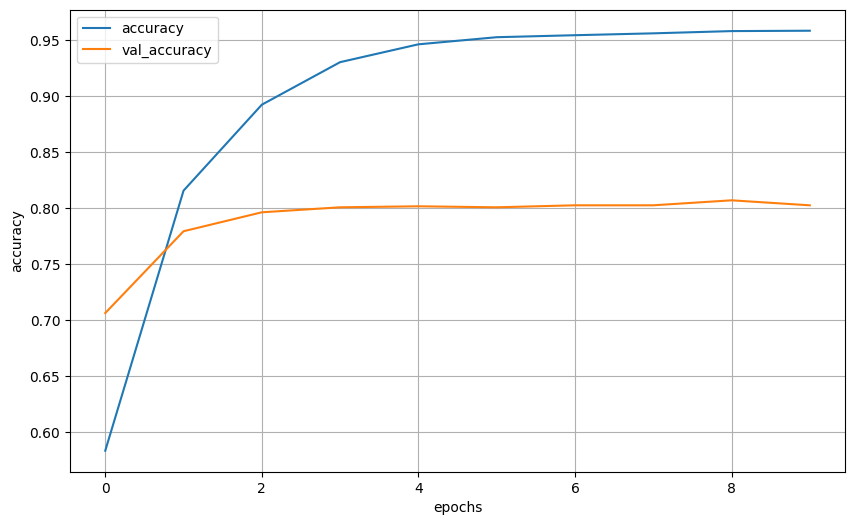

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot(figsize=(10, 6))
plt.grid(True)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

## Predicción con el subconjunto de datos de prueba

In [17]:
error, accuracy, precision = model.evaluate(X_test, Y_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - Precision: 0.8305 - accuracy: 0.8046 - loss: 0.9952


In [18]:
print('Error: ', error)
print('Accuracy: ', accuracy)
print('Precision: ', precision)

Error:  0.9820477366447449
Accuracy:  0.8005343079566956
Precision:  0.8285714387893677
